In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

## Reading the Data

In [3]:
df = pd.read_csv("DataSets\Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [5]:
df.isna()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False,False


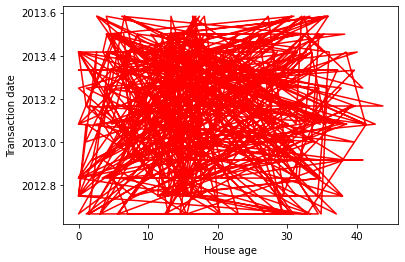

In [6]:
plt.xlabel('House age')
plt.ylabel('Transaction date')
a = df['X2 house age']
b = df['X1 transaction date']
plt.plot(a, b, color = 'red')
plt.show()

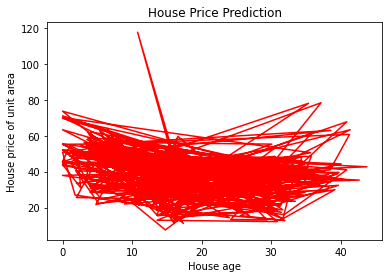

In [7]:
plt.xlabel('House age')
plt.ylabel('House price of unit area')
plt.title('House Price Prediction')
a = df['X2 house age']
b = df['Y house price of unit area']
plt.plot(a, b, color = 'red')
plt.show()

## Preparing the data

In [8]:
X = df.drop(['Y house price of unit area'], axis = 1)
y = df['Y house price of unit area']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the data 

In [10]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## plotting the values

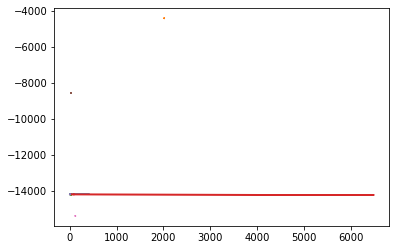

In [11]:
# plotting the regression line
line = reg.coef_*X+reg.intercept_
# Plotting for the test data

plt.plot(X, line);
plt.show()

## Predictions

In [12]:
h_pred = reg.predict(X_test)

In [13]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': h_pred}) 
df1

,Actual,Predicted
356,45.3,39.582394
170,14.4,12.951683
224,46.0,41.923561
331,15.6,12.045238
306,50.2,42.059470
...,...,...
308,53.0,46.656310
100,38.2,45.172247
7,46.7,47.711068
22,24.6,29.952049


In [14]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

## Prediction with new values

In [15]:
df2 = pd.DataFrame({'No':[415], 'X1 transaction date':[2013.000], 'X2 house age':[8], 
                    'X3 distance to the nearest MRT station':[800.54378], 'X4 number of convenience stores':[5], 
                    'X5 latitude':[24.98322], 'X6 longitude':[121.57382]
                  })

In [16]:
reg.predict(df2)

array([44.01945539])

## Mean Absolute Error

In [18]:
from sklearn import metrics

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, h_pred)) 

Mean Absolute Error: 5.77654179811626
